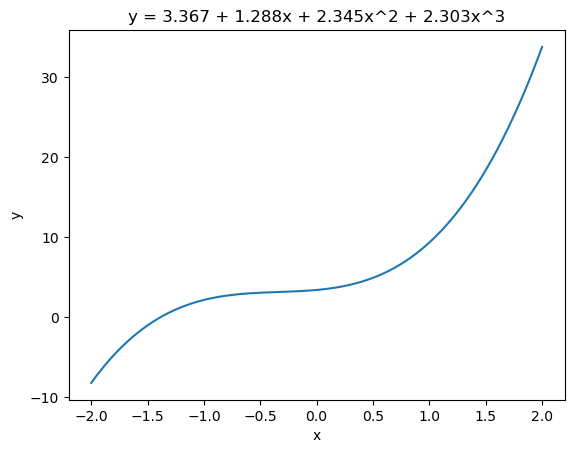

In [1]:
import torch
import matplotlib.pyplot as plt

#default: dtype = torch.float
#default: device = torch.device("cpu")
torch.manual_seed(42)

x = torch.linspace(-2, 2, 2000)

h_0 = torch.round(torch.randn(())*10, decimals=3)
h_1 = torch.round(torch.randn(())*10, decimals=3)
h_2 = torch.round(torch.randn(())*10, decimals=3)
h_3 = torch.round(torch.randn(())*10, decimals=3)

y = h_0 + h_1 * x + h_2 * x**2 + h_3 * x**3

#Plot x and y
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"y = {h_0:.3f} + {h_1:.3f}x + {h_2:.3f}x^2 + {h_3:.3f}x^3")
plt.show()

1000 / 1000 :: Loss :: 3017862.623512268


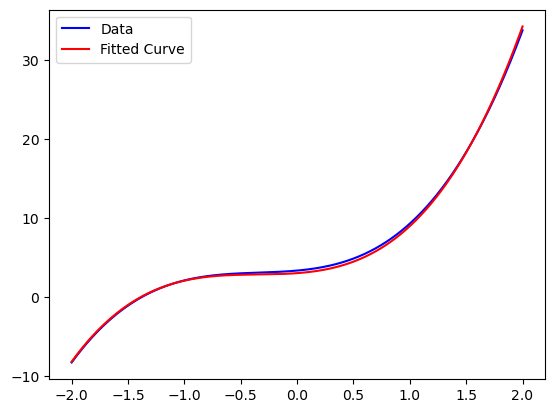

In [2]:
import torch.nn as nn

class CurveFitting(nn.Module):
    def __init__(self, lr, epochs):
        super(CurveFitting, self).__init__()

        # # Dynamically create parameters
        # for i in range(no_of_params):
        #     param_name = "a" + str(i)
        #     # Create a learnable parameter for each a_i
        #     setattr(self, param_name, nn.Parameter(torch.randn(1)))
        self.a = nn.Parameter(torch.rand(1))
        self.b = nn.Parameter(torch.rand(1))
        self.c = nn.Parameter(torch.rand(1))
        self.d = nn.Parameter(torch.rand(1))
        self.epochs = epochs
        self.optimizer = torch.optim.SGD([self.a, self.b, self.c, self.d], lr = 0.000001)

    def predict(self, x):
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def fitCurve(self, X, y):
        total_loss = 0
        for epoch in range(self.epochs):
            y_pred = self.predict(X)
            error = y_pred - y
            loss = error.pow(2).sum()
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            total_loss = total_loss + loss.item()
        print(f"{epoch + 1} / {self.epochs} :: Loss :: {total_loss}")

            


# Example usage:
model = CurveFitting(0.01, 1000)
model.fitCurve(x, y)

# Plot the results
with torch.no_grad():
    y_pred = model.predict(x)

plt.plot(x, y, color='blue', label='Data')
plt.plot(x, y_pred.numpy(), color='red', label='Fitted Curve')
plt.legend()
plt.show()